# Importing packages

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
import numpy as np
import random
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from matplotlib import pyplot as plt

# Importing data and creating train test sets

In [3]:
from google.colab import files
uploaded = files.upload()

Saving sliding_train_bal_x.csv to sliding_train_bal_x.csv
Saving ewma_test_x.csv to ewma_test_x.csv
Saving sliding_test_x.csv to sliding_test_x.csv
Saving ewma_test_y.csv to ewma_test_y.csv
Saving sliding_test_y.csv to sliding_test_y.csv
Saving ewma_train_bal_y.csv to ewma_train_bal_y.csv
Saving ewma_train_bal_x.csv to ewma_train_bal_x.csv
Saving sliding_train_bal_y.csv to sliding_train_bal_y.csv


In [4]:
import io

sliding_train_bal_x = pd.read_csv(io.BytesIO(uploaded['sliding_train_bal_x.csv'])).reset_index(drop=True).drop(columns = ['Unnamed: 0'])
sliding_train_bal_y = pd.read_csv(io.BytesIO(uploaded['sliding_train_bal_y.csv'])).reset_index(drop=True).drop(columns = ['Unnamed: 0'])

sliding_test_x = pd.read_csv(io.BytesIO(uploaded['sliding_test_x.csv'])).reset_index(drop=True).drop(columns = ['Unnamed: 0'])
sliding_test_y = pd.read_csv(io.BytesIO(uploaded['sliding_test_y.csv'])).reset_index(drop=True).drop(columns = ['Unnamed: 0'])

ewma_train_bal_x = pd.read_csv(io.BytesIO(uploaded['ewma_train_bal_x.csv'])).reset_index(drop=True).drop(columns = ['Unnamed: 0'])
ewma_train_bal_y = pd.read_csv(io.BytesIO(uploaded['ewma_train_bal_y.csv'])).reset_index(drop=True).drop(columns = ['Unnamed: 0'])

ewma_test_x = pd.read_csv(io.BytesIO(uploaded['ewma_test_x.csv'])).reset_index(drop=True).drop(columns = ['Unnamed: 0'])
ewma_test_y = pd.read_csv(io.BytesIO(uploaded['ewma_test_y.csv'])).reset_index(drop=True).drop(columns = ['Unnamed: 0'])

In [5]:
scaler = StandardScaler()
sliding_train_bal_x_scale = scaler.fit_transform(sliding_train_bal_x)
sliding_test_x_scale = scaler.transform(sliding_test_x)

scaler = StandardScaler()
ewma_train_bal_x_scale = scaler.fit_transform(ewma_train_bal_x)
ewma_test_x_scale = scaler.transform(ewma_test_x)

In [6]:
selector = SelectKBest(score_func=f_classif, k=51)
sliding_train_bal_x_feat = selector.fit_transform(sliding_train_bal_x, sliding_train_bal_y)
sliding_test_x_feat = selector.transform(sliding_test_x)

selector = SelectKBest(score_func=f_classif, k=53)
sliding_train_bal_x_scale_feat = selector.fit_transform(sliding_train_bal_x_scale, sliding_train_bal_y)
sliding_test_x_scale_feat = selector.transform(sliding_test_x_scale)

selector = SelectKBest(score_func=f_classif, k=62)
ewma_train_bal_x_feat = selector.fit_transform(ewma_train_bal_x, ewma_train_bal_y)
ewma_test_x_feat = selector.transform(ewma_test_x)

selector = SelectKBest(score_func=f_classif, k=59)
ewma_train_bal_x_scale_feat = selector.fit_transform(ewma_train_bal_x_scale, ewma_train_bal_y)
ewma_test_x_scale_feat = selector.transform(ewma_test_x_scale)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

# Basic neural networks

## Sliding all features

In [ ]:
random.seed(7)
tf.random.set_seed(7)
np.random.seed(7)

model = Sequential()
model.add(Dense(128, input_shape=(70,), activation='relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'AUC', keras.metrics.Precision(), keras.metrics.Recall()])

sliding_train_bal_x_tr = sliding_train_bal_x[:5112]
sliding_train_bal_y_tr = sliding_train_bal_y[:5112]
sliding_train_bal_x_val = sliding_train_bal_x[5112:]
sliding_train_bal_y_val = sliding_train_bal_y[5112:]
train_result = model.fit(sliding_train_bal_x_tr, sliding_train_bal_y_tr, epochs=50, batch_size=32, validation_data=(sliding_train_bal_x_val, sliding_train_bal_y_val))

loss, accuracy, auc, precision, recall = model.evaluate(sliding_test_x, sliding_test_y)
print('Test Accuracy:', accuracy)
print('Test Loss:', loss)
print('Test AUC:', auc)
print('Test Precision:', precision)
print('Test Recall:', recall)

f1 = (2*precision*recall)/(precision + recall)

print('Test F1:', f1)

Epoch 1/50
160/160 [==============================] - 4s 9ms/step - loss: 1.6803 - accuracy: 0.5601 - auc: 0.5755 - precision_33: 0.6084 - recall_33: 0.6316 - val_loss: 0.6821 - val_accuracy: 0.4922 - val_auc: 0.6761 - val_precision_33: 0.2886 - val_recall_33: 0.8294
Epoch 2/50
160/160 [==============================] - 1s 6ms/step - loss: 0.7416 - accuracy: 0.6015 - auc: 0.6234 - precision_33: 0.6270 - recall_33: 0.7357 - val_loss: 0.6610 - val_accuracy: 0.5117 - val_auc: 0.6889 - val_precision_33: 0.2954 - val_recall_33: 0.8157
Epoch 3/50
160/160 [==============================] - 1s 4ms/step - loss: 0.6979 - accuracy: 0.5937 - auc: 0.6147 - precision_33: 0.6194 - recall_33: 0.7374 - val_loss: 0.6600 - val_accuracy: 0.5039 - val_auc: 0.6895 - val_precision_33: 0.2918 - val_recall_33: 0.8157
Epoch 4/50
160/160 [==============================] - 0s 3ms/step - loss: 0.6732 - accuracy: 0.6086 - auc: 0.6357 - precision_33: 0.6276 - recall_33: 0.7636 - val_loss: 0.6792 - val_accuracy: 0.50

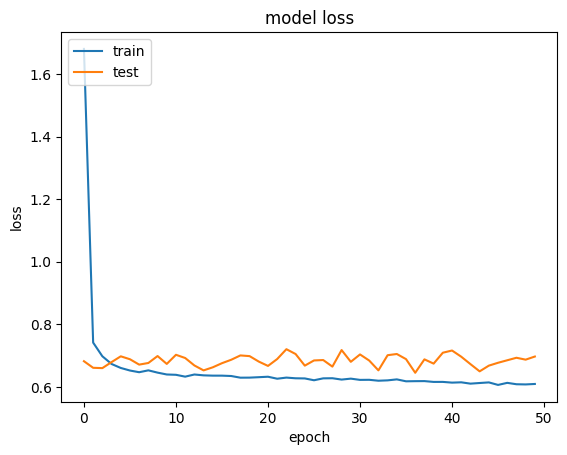

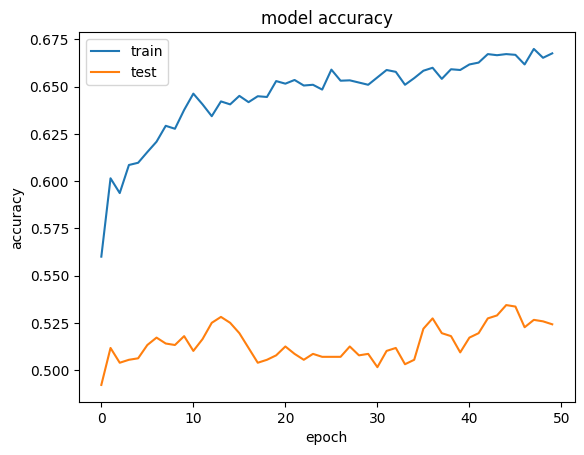

In [ ]:
plt.plot(train_result.history['loss'])
plt.plot(train_result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(train_result.history['accuracy'])
plt.plot(train_result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Sliding all features scaled

In [ ]:
random.seed(7)
tf.random.set_seed(7)
np.random.seed(7)

model = Sequential()
model.add(Dense(128, input_shape=(70,), activation='relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'AUC', keras.metrics.Precision(), keras.metrics.Recall()])

sliding_train_bal_x_scale_tr = sliding_train_bal_x_scale[:5112]
sliding_train_bal_y_tr = sliding_train_bal_y[:5112]
sliding_train_bal_x_scale_val = sliding_train_bal_x_scale[5112:]
sliding_train_bal_y_val = sliding_train_bal_y[5112:]
train_result = model.fit(sliding_train_bal_x_scale_tr, sliding_train_bal_y_tr, epochs=20, batch_size=32, validation_data=(sliding_train_bal_x_scale_val, sliding_train_bal_y_val))

loss, accuracy, auc, precision, recall = model.evaluate(sliding_test_x_scale, sliding_test_y)
print('Test Accuracy:', accuracy)
print('Test Loss:', loss)
print('Test AUC:', auc)
print('Test Precision:', precision)
print('Test Recall:', recall)

f1 = (2*precision*recall)/(precision + recall)

print('Test F1:', f1)

Epoch 1/20
160/160 [==============================] - 5s 7ms/step - loss: 0.6585 - accuracy: 0.6158 - auc: 0.6440 - precision_36: 0.6446 - recall_36: 0.7205 - val_loss: 0.7210 - val_accuracy: 0.5258 - val_auc: 0.6715 - val_precision_36: 0.2911 - val_recall_36: 0.7440
Epoch 2/20
160/160 [==============================] - 1s 5ms/step - loss: 0.6370 - accuracy: 0.6405 - auc: 0.6792 - precision_36: 0.6570 - recall_36: 0.7671 - val_loss: 0.6630 - val_accuracy: 0.5736 - val_auc: 0.6908 - val_precision_36: 0.3043 - val_recall_36: 0.6689
Epoch 3/20
160/160 [==============================] - 1s 5ms/step - loss: 0.6290 - accuracy: 0.6455 - auc: 0.6928 - precision_36: 0.6679 - recall_36: 0.7471 - val_loss: 0.6907 - val_accuracy: 0.5548 - val_auc: 0.6907 - val_precision_36: 0.3051 - val_recall_36: 0.7372
Epoch 4/20
160/160 [==============================] - 1s 4ms/step - loss: 0.6250 - accuracy: 0.6543 - auc: 0.6973 - precision_36: 0.6730 - recall_36: 0.7609 - val_loss: 0.6764 - val_accuracy: 0.58

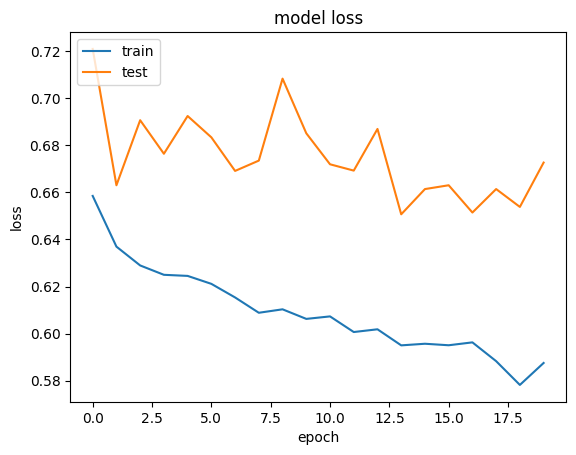

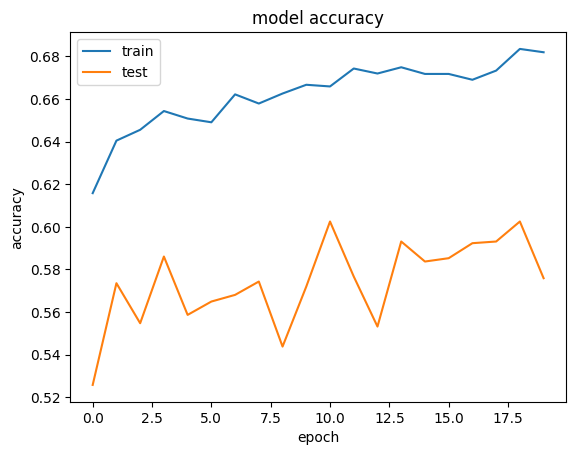

In [ ]:
plt.plot(train_result.history['loss'])
plt.plot(train_result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(train_result.history['accuracy'])
plt.plot(train_result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Sliding feature selection

In [7]:
random.seed(7)
tf.random.set_seed(7)
np.random.seed(7)

model = Sequential()
model.add(Dense(128, input_shape=(51,), activation='relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'AUC', keras.metrics.Precision(), keras.metrics.Recall()])

sliding_train_bal_x_feat_tr = sliding_train_bal_x_feat[:5112]
sliding_train_bal_y_tr = sliding_train_bal_y[:5112]
sliding_train_bal_x_feat_val = sliding_train_bal_x_feat[5112:]
sliding_train_bal_y_val = sliding_train_bal_y[5112:]
train_result = model.fit(sliding_train_bal_x_feat_tr, sliding_train_bal_y_tr, epochs=35, batch_size=32, validation_data=(sliding_train_bal_x_feat_val, sliding_train_bal_y_val))


loss, accuracy, auc, precision, recall = model.evaluate(sliding_test_x_feat, sliding_test_y)
print('Test Accuracy:', accuracy)
print('Test Loss:', loss)
print('Test AUC:', auc)
print('Test Precision:', precision)
print('Test Recall:', recall)

f1 = (2*precision*recall)/(precision + recall)

print('Test F1:', f1)

Epoch 1/35
160/160 [==============================] - 6s 15ms/step - loss: 1.4713 - accuracy: 0.5589 - auc: 0.5752 - precision: 0.6051 - recall: 0.6416 - val_loss: 0.7076 - val_accuracy: 0.4679 - val_auc: 0.6862 - val_precision: 0.2804 - val_recall: 0.8430
Epoch 2/35
160/160 [==============================] - 1s 6ms/step - loss: 0.7457 - accuracy: 0.5851 - auc: 0.5986 - precision: 0.6094 - recall: 0.7498 - val_loss: 0.7121 - val_accuracy: 0.3787 - val_auc: 0.6854 - val_precision: 0.2551 - val_recall: 0.8908
Epoch 3/35
160/160 [==============================] - 1s 8ms/step - loss: 0.6981 - accuracy: 0.5886 - auc: 0.6095 - precision: 0.6066 - recall: 0.7836 - val_loss: 0.7028 - val_accuracy: 0.4781 - val_auc: 0.6894 - val_precision: 0.2831 - val_recall: 0.8328
Epoch 4/35
160/160 [==============================] - 1s 9ms/step - loss: 0.6699 - accuracy: 0.6109 - auc: 0.6393 - precision: 0.6221 - recall: 0.8015 - val_loss: 0.6806 - val_accuracy: 0.4937 - val_auc: 0.6908 - val_precision: 0.2

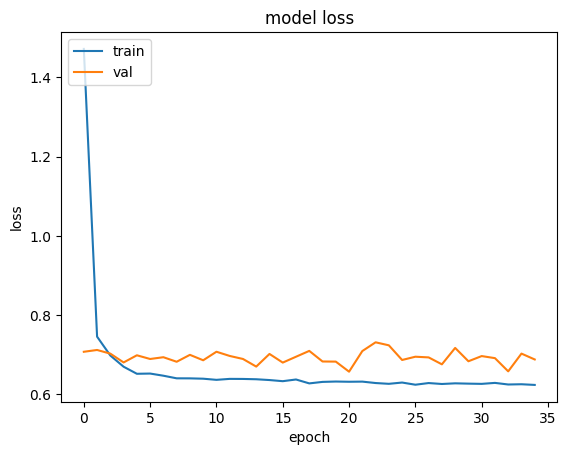

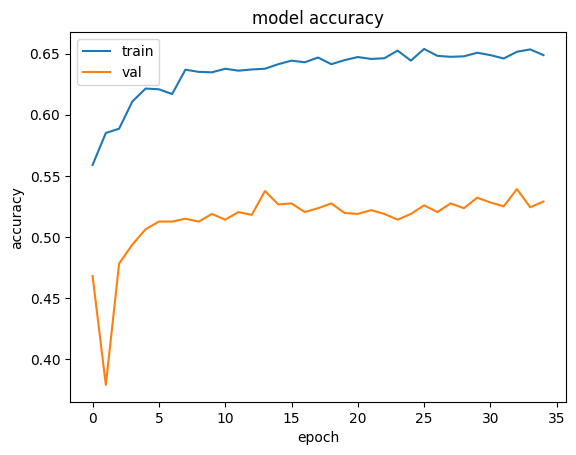

In [8]:
plt.plot(train_result.history['loss'])
plt.plot(train_result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(train_result.history['accuracy'])
plt.plot(train_result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Sliding feature selection scaled

In [ ]:
random.seed(7)
tf.random.set_seed(7)
np.random.seed(7)

model = Sequential()
model.add(Dense(128, input_shape=(53,), activation='relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'AUC', keras.metrics.Precision(), keras.metrics.Recall()])

sliding_train_bal_x_scale_feat_tr = sliding_train_bal_x_scale_feat[:5112]
sliding_train_bal_y_tr = sliding_train_bal_y[:5112]
sliding_train_bal_x_feat__scale_val = sliding_train_bal_x_scale_feat[5112:]
sliding_train_bal_y_val = sliding_train_bal_y[5112:]
train_result = model.fit(sliding_train_bal_x_scale_feat_tr, sliding_train_bal_y_tr, epochs=20, batch_size=32, validation_data=(sliding_train_bal_x_feat__scale_val, sliding_train_bal_y_val))

loss, accuracy, auc, precision, recall = model.evaluate(sliding_test_x_scale_feat, sliding_test_y)
print('Test Accuracy:', accuracy)
print('Test Loss:', loss)
print('Test AUC:', auc)
print('Test Precision:', precision)
print('Test Recall:', recall)

f1 = (2*precision*recall)/(precision + recall)

print('Test F1:', f1)

Epoch 1/20
160/160 [==============================] - 4s 9ms/step - loss: 0.6524 - accuracy: 0.6183 - auc: 0.6533 - precision_41: 0.6498 - recall_41: 0.7109 - val_loss: 0.7347 - val_accuracy: 0.5211 - val_auc: 0.6820 - val_precision_41: 0.2984 - val_recall_41: 0.8055
Epoch 2/20
160/160 [==============================] - 0s 3ms/step - loss: 0.6368 - accuracy: 0.6387 - auc: 0.6794 - precision_41: 0.6563 - recall_41: 0.7633 - val_loss: 0.6735 - val_accuracy: 0.5908 - val_auc: 0.6874 - val_precision_41: 0.3175 - val_recall_41: 0.6826
Epoch 3/20
160/160 [==============================] - 1s 4ms/step - loss: 0.6270 - accuracy: 0.6420 - auc: 0.6911 - precision_41: 0.6645 - recall_41: 0.7460 - val_loss: 0.6726 - val_accuracy: 0.5634 - val_auc: 0.6887 - val_precision_41: 0.3088 - val_recall_41: 0.7304
Epoch 4/20
160/160 [==============================] - 0s 3ms/step - loss: 0.6235 - accuracy: 0.6459 - auc: 0.6987 - precision_41: 0.6631 - recall_41: 0.7650 - val_loss: 0.6846 - val_accuracy: 0.56

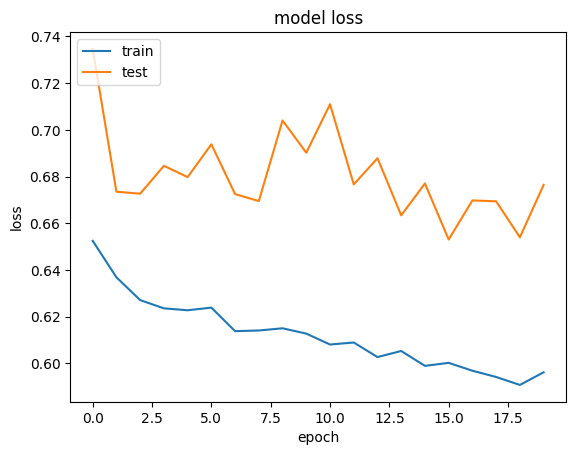

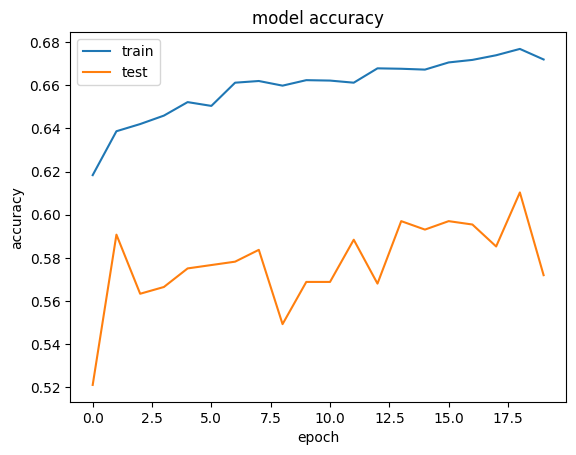

In [ ]:
plt.plot(train_result.history['loss'])
plt.plot(train_result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(train_result.history['accuracy'])
plt.plot(train_result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## EWMA all features

In [ ]:
random.seed(7)
tf.random.set_seed(7)
np.random.seed(7)

model = Sequential()
model.add(Dense(128, input_shape=(70,), activation='relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'AUC', keras.metrics.Precision(), keras.metrics.Recall()])

ewma_train_bal_x_tr = ewma_train_bal_x[:5112]
ewma_train_bal_y_tr = ewma_train_bal_y[:5112]
ewma_train_bal_x_val = ewma_train_bal_x[5112:]
ewma_train_bal_y_val = ewma_train_bal_y[5112:]
train_result = model.fit(ewma_train_bal_x_tr, ewma_train_bal_y_tr, epochs=50, batch_size=32, validation_data=(ewma_train_bal_x_val, ewma_train_bal_y_val))


loss, accuracy, auc, precision, recall = model.evaluate(ewma_test_x, ewma_test_y)
print('Test Accuracy:', accuracy)
print('Test Loss:', loss)
print('Test AUC:', auc)
print('Test Precision:', precision)
print('Test Recall:', recall)

f1 = (2*precision*recall)/(precision + recall)

print('Test F1:', f1)

Epoch 1/50
160/160 [==============================] - 6s 16ms/step - loss: 1.6900 - accuracy: 0.5614 - auc: 0.5779 - precision_45: 0.6084 - recall_45: 0.6382 - val_loss: 0.6867 - val_accuracy: 0.5016 - val_auc: 0.6809 - val_precision_45: 0.2933 - val_recall_45: 0.8328
Epoch 2/50
160/160 [==============================] - 1s 6ms/step - loss: 0.7390 - accuracy: 0.5990 - auc: 0.6224 - precision_45: 0.6228 - recall_45: 0.7443 - val_loss: 0.7157 - val_accuracy: 0.5000 - val_auc: 0.6919 - val_precision_45: 0.2890 - val_recall_45: 0.8089
Epoch 3/50
160/160 [==============================] - 1s 7ms/step - loss: 0.7027 - accuracy: 0.5869 - auc: 0.6088 - precision_45: 0.6147 - recall_45: 0.7295 - val_loss: 0.6774 - val_accuracy: 0.5203 - val_auc: 0.6938 - val_precision_45: 0.2990 - val_recall_45: 0.8123
Epoch 4/50
160/160 [==============================] - 1s 4ms/step - loss: 0.6791 - accuracy: 0.6097 - auc: 0.6332 - precision_45: 0.6279 - recall_45: 0.7671 - val_loss: 0.6582 - val_accuracy: 0.5

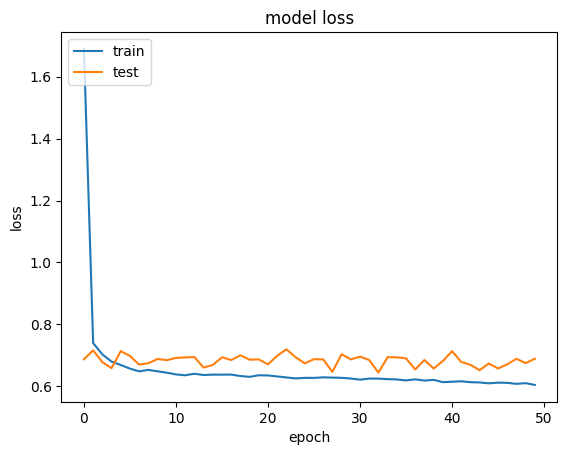

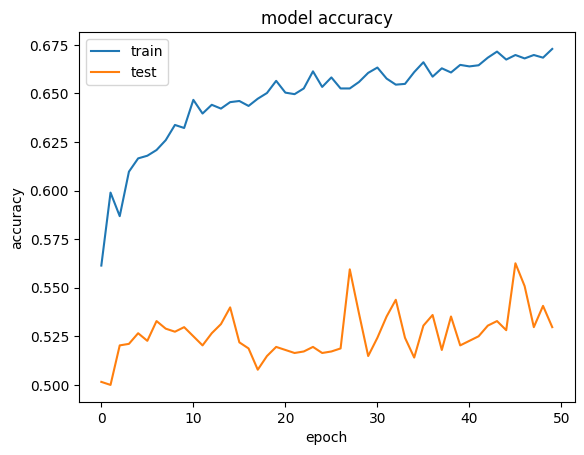

In [ ]:
plt.plot(train_result.history['loss'])
plt.plot(train_result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(train_result.history['accuracy'])
plt.plot(train_result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## EWMA all features scaled

In [ ]:
random.seed(7)
tf.random.set_seed(7)
np.random.seed(7)

model = Sequential()
model.add(Dense(128, input_shape=(70,), activation='relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'AUC', keras.metrics.Precision(), keras.metrics.Recall()])

ewma_train_bal_x_scale_tr = ewma_train_bal_x_scale[:5112]
ewma_train_bal_y_tr = ewma_train_bal_y[:5112]
ewma_train_bal_x_scale_val = ewma_train_bal_x_scale[5112:]
ewma_train_bal_y_val = ewma_train_bal_y[5112:]
train_result=model.fit(ewma_train_bal_x_scale_tr, ewma_train_bal_y_tr, epochs=17, batch_size=32, validation_data=(ewma_train_bal_x_scale_val, ewma_train_bal_y_val))

loss, accuracy, auc, precision, recall = model.evaluate(ewma_test_x_scale, ewma_test_y)
print('Test Accuracy:', accuracy)
print('Test Loss:', loss)
print('Test AUC:', auc)
print('Test Precision:', precision)
print('Test Recall:', recall)

f1 = (2*precision*recall)/(precision + recall)

print('Test F1:', f1)

Epoch 1/17
160/160 [==============================] - 2s 6ms/step - loss: 0.6704 - accuracy: 0.6097 - auc: 0.6278 - precision_49: 0.6366 - recall_49: 0.7285 - val_loss: 0.7467 - val_accuracy: 0.4883 - val_auc: 0.6735 - val_precision_49: 0.2849 - val_recall_49: 0.8157
Epoch 2/17
160/160 [==============================] - 0s 3ms/step - loss: 0.6442 - accuracy: 0.6338 - auc: 0.6696 - precision_49: 0.6494 - recall_49: 0.7715 - val_loss: 0.6787 - val_accuracy: 0.5790 - val_auc: 0.6850 - val_precision_49: 0.3107 - val_recall_49: 0.6860
Epoch 3/17
160/160 [==============================] - 1s 4ms/step - loss: 0.6359 - accuracy: 0.6373 - auc: 0.6773 - precision_49: 0.6603 - recall_49: 0.7436 - val_loss: 0.7051 - val_accuracy: 0.5516 - val_auc: 0.6857 - val_precision_49: 0.3017 - val_recall_49: 0.7270
Epoch 4/17
160/160 [==============================] - 1s 5ms/step - loss: 0.6322 - accuracy: 0.6418 - auc: 0.6861 - precision_49: 0.6618 - recall_49: 0.7547 - val_loss: 0.6839 - val_accuracy: 0.56

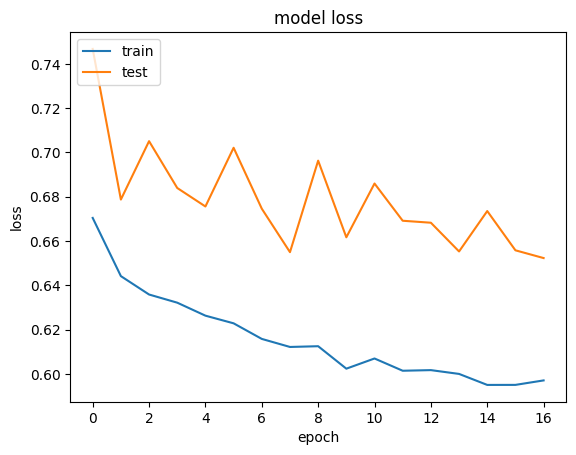

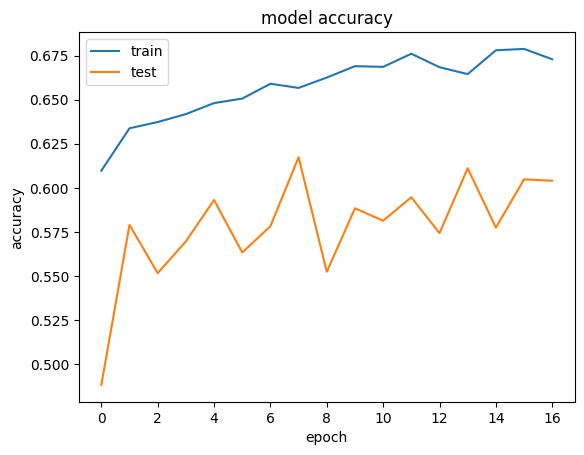

In [ ]:
plt.plot(train_result.history['loss'])
plt.plot(train_result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(train_result.history['accuracy'])
plt.plot(train_result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## EWMA feature selection

In [ ]:
random.seed(7)
tf.random.set_seed(7)
np.random.seed(7)

model = Sequential()
model.add(Dense(128, input_shape=(62,), activation='relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'AUC', keras.metrics.Precision(), keras.metrics.Recall()])

ewma_train_bal_x_feat_tr = ewma_train_bal_x_feat[:5112]
ewma_train_bal_y_tr = ewma_train_bal_y[:5112]
ewma_train_bal_x_feat_val = ewma_train_bal_x_feat[5112:]
ewma_train_bal_y_val = ewma_train_bal_y[5112:]
train_result = model.fit(ewma_train_bal_x_feat_tr, ewma_train_bal_y_tr, epochs=50, batch_size=32, validation_data=(ewma_train_bal_x_feat_val, ewma_train_bal_y_val))


loss, accuracy, auc, precision, recall = model.evaluate(ewma_test_x_feat, ewma_test_y)
print('Test Accuracy:', accuracy)
print('Test Loss:', loss)
print('Test AUC:', auc)
print('Test Precision:', precision)
print('Test Recall:', recall)

f1 = (2*precision*recall)/(precision + recall)

print('Test F1:', f1)

Epoch 1/50
160/160 [==============================] - 5s 14ms/step - loss: 1.4974 - accuracy: 0.5675 - auc: 0.5791 - precision_51: 0.6143 - recall_51: 0.6399 - val_loss: 0.7282 - val_accuracy: 0.4781 - val_auc: 0.6885 - val_precision_51: 0.2821 - val_recall_51: 0.8259
Epoch 2/50
160/160 [==============================] - 1s 7ms/step - loss: 0.7468 - accuracy: 0.5779 - auc: 0.5992 - precision_51: 0.6095 - recall_51: 0.7136 - val_loss: 0.6899 - val_accuracy: 0.5063 - val_auc: 0.6925 - val_precision_51: 0.2959 - val_recall_51: 0.8362
Epoch 3/50
160/160 [==============================] - 1s 4ms/step - loss: 0.6915 - accuracy: 0.5906 - auc: 0.6067 - precision_51: 0.6113 - recall_51: 0.7657 - val_loss: 0.7060 - val_accuracy: 0.4828 - val_auc: 0.6915 - val_precision_51: 0.2850 - val_recall_51: 0.8328
Epoch 4/50
160/160 [==============================] - 0s 3ms/step - loss: 0.6785 - accuracy: 0.6072 - auc: 0.6297 - precision_51: 0.6189 - recall_51: 0.8019 - val_loss: 0.6774 - val_accuracy: 0.4

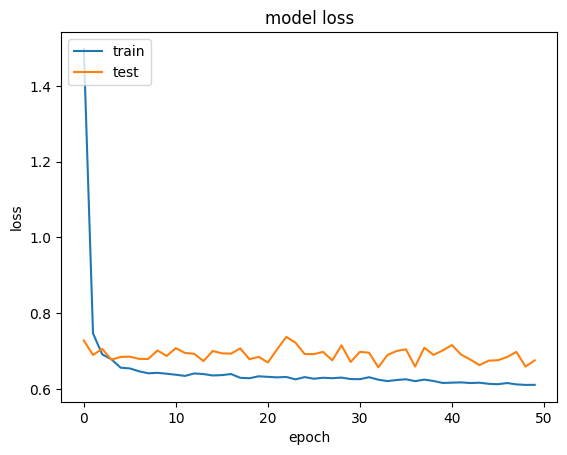

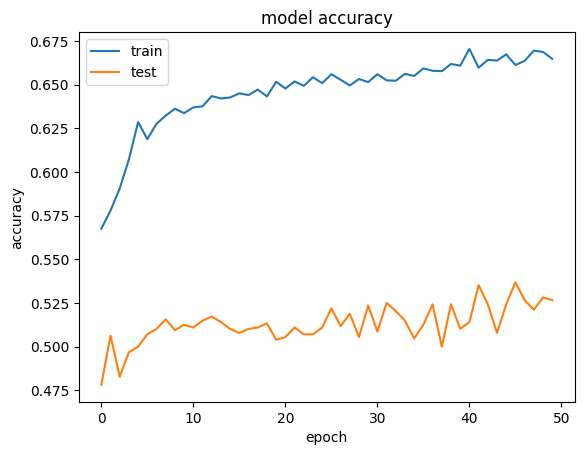

In [ ]:
plt.plot(train_result.history['loss'])
plt.plot(train_result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(train_result.history['accuracy'])
plt.plot(train_result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## EWMA feature selection scaled

In [ ]:
random.seed(7)
tf.random.set_seed(7)
np.random.seed(7)

model = Sequential()
model.add(Dense(128, input_shape=(59,), activation='relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'AUC', keras.metrics.Precision(), keras.metrics.Recall()])

ewma_train_bal_x_scale_feat_tr = ewma_train_bal_x_scale_feat[:5112]
ewma_train_bal_y_tr = ewma_train_bal_y[:5112]
ewma_train_bal_x_scale_feat_val = ewma_train_bal_x_scale_feat[5112:]
ewma_train_bal_y_val = ewma_train_bal_y[5112:]
train_result = model.fit(ewma_train_bal_x_scale_feat_tr, ewma_train_bal_y_tr, epochs=18, batch_size=32, validation_data=(ewma_train_bal_x_scale_feat_val, ewma_train_bal_y_val))

loss, accuracy, auc, precision, recall = model.evaluate(ewma_test_x_scale_feat, ewma_test_y)
print('Test Accuracy:', accuracy)
print('Test Loss:', loss)
print('Test AUC:', auc)
print('Test Precision:', precision)
print('Test Recall:', recall)

f1 = (2*precision*recall)/(precision + recall)

print('Test F1:', f1)

Epoch 1/18
160/160 [==============================] - 5s 10ms/step - loss: 0.6695 - accuracy: 0.6076 - auc: 0.6326 - precision_55: 0.6373 - recall_55: 0.7167 - val_loss: 0.7281 - val_accuracy: 0.5219 - val_auc: 0.6674 - val_precision_55: 0.2919 - val_recall_55: 0.7611
Epoch 2/18
160/160 [==============================] - 1s 3ms/step - loss: 0.6464 - accuracy: 0.6291 - auc: 0.6659 - precision_55: 0.6474 - recall_55: 0.7612 - val_loss: 0.6721 - val_accuracy: 0.6002 - val_auc: 0.6798 - val_precision_55: 0.3183 - val_recall_55: 0.6519
Epoch 3/18
160/160 [==============================] - 0s 3ms/step - loss: 0.6344 - accuracy: 0.6440 - auc: 0.6847 - precision_55: 0.6631 - recall_55: 0.7581 - val_loss: 0.6753 - val_accuracy: 0.5759 - val_auc: 0.6823 - val_precision_55: 0.3099 - val_recall_55: 0.6928
Epoch 4/18
160/160 [==============================] - 0s 3ms/step - loss: 0.6295 - accuracy: 0.6465 - auc: 0.6900 - precision_55: 0.6632 - recall_55: 0.7667 - val_loss: 0.6947 - val_accuracy: 0.5

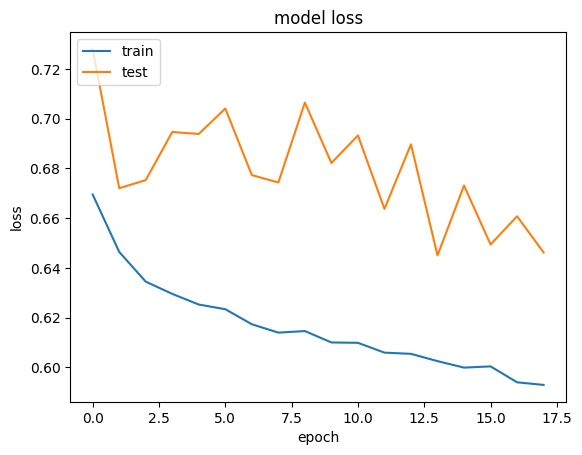

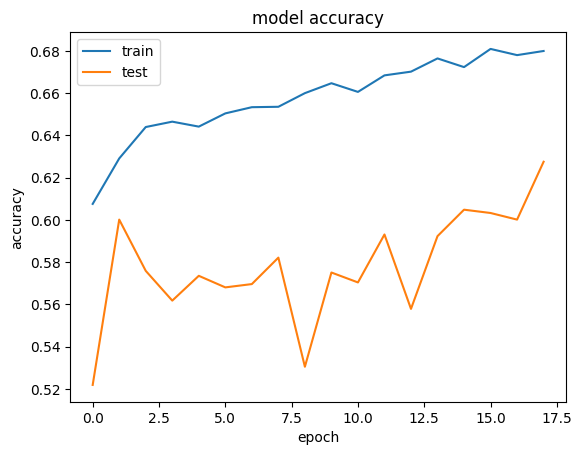

In [ ]:
plt.plot(train_result.history['loss'])
plt.plot(train_result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(train_result.history['accuracy'])
plt.plot(train_result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Neural networks smaller

## Sliding all features

In [ ]:
random.seed(7)
tf.random.set_seed(7)
np.random.seed(7)

model = Sequential()
model.add(Dense(64, input_shape=(70,), activation='relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'AUC', keras.metrics.Precision(), keras.metrics.Recall()])

sliding_train_bal_x_tr = sliding_train_bal_x[:5112]
sliding_train_bal_y_tr = sliding_train_bal_y[:5112]
sliding_train_bal_x_val = sliding_train_bal_x[5112:]
sliding_train_bal_y_val = sliding_train_bal_y[5112:]
train_result = model.fit(sliding_train_bal_x_tr, sliding_train_bal_y_tr, epochs=50, batch_size=32, validation_data=(sliding_train_bal_x_val, sliding_train_bal_y_val))


loss, accuracy, auc, precision, recall = model.evaluate(sliding_test_x, sliding_test_y)
print('Test Accuracy:', accuracy)
print('Test Loss:', loss)
print('Test AUC:', auc)
print('Test Precision:', precision)
print('Test Recall:', recall)

f1 = (2*precision*recall)/(precision + recall)

print('Test F1:', f1)

Epoch 1/50
160/160 [==============================] - 3s 5ms/step - loss: 2.4084 - accuracy: 0.5599 - auc: 0.5676 - precision_6: 0.6088 - recall_6: 0.6285 - val_loss: 0.7689 - val_accuracy: 0.5086 - val_auc: 0.6858 - val_precision_6: 0.2950 - val_recall_6: 0.8225
Epoch 2/50
160/160 [==============================] - 0s 3ms/step - loss: 0.9620 - accuracy: 0.5689 - auc: 0.5863 - precision_6: 0.6122 - recall_6: 0.6561 - val_loss: 0.6219 - val_accuracy: 0.5290 - val_auc: 0.6886 - val_precision_6: 0.3022 - val_recall_6: 0.8055
Epoch 3/50
160/160 [==============================] - 0s 3ms/step - loss: 0.7378 - accuracy: 0.5988 - auc: 0.6187 - precision_6: 0.6239 - recall_6: 0.7385 - val_loss: 0.6948 - val_accuracy: 0.4937 - val_auc: 0.6977 - val_precision_6: 0.2908 - val_recall_6: 0.8396
Epoch 4/50
160/160 [==============================] - 1s 6ms/step - loss: 0.6804 - accuracy: 0.6197 - auc: 0.6360 - precision_6: 0.6297 - recall_6: 0.8015 - val_loss: 0.6991 - val_accuracy: 0.4945 - val_auc: 

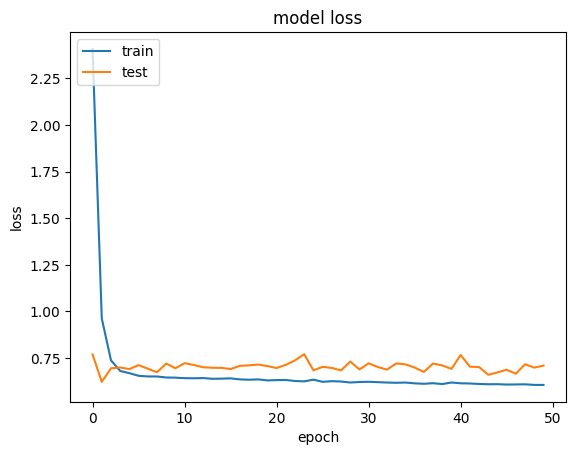

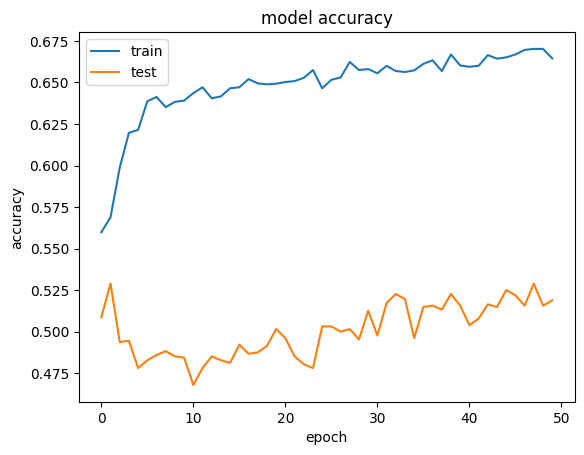

In [ ]:
plt.plot(train_result.history['loss'])
plt.plot(train_result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(train_result.history['accuracy'])
plt.plot(train_result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Sliding all features scaled

In [ ]:
random.seed(7)
tf.random.set_seed(7)
np.random.seed(7)

model = Sequential()
model.add(Dense(64, input_shape=(70,), activation='relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'AUC', keras.metrics.Precision(), keras.metrics.Recall()])

sliding_train_bal_x_scale_tr = sliding_train_bal_x_scale[:5112]
sliding_train_bal_y_tr = sliding_train_bal_y[:5112]
sliding_train_bal_x_scale_val = sliding_train_bal_x_scale[5112:]
sliding_train_bal_y_val = sliding_train_bal_y[5112:]
train_result = model.fit(sliding_train_bal_x_scale_tr, sliding_train_bal_y_tr, epochs=35, batch_size=32, validation_data=(sliding_train_bal_x_scale_val, sliding_train_bal_y_val))

loss, accuracy, auc, precision, recall = model.evaluate(sliding_test_x_scale, sliding_test_y)
print('Test Accuracy:', accuracy)
print('Test Loss:', loss)
print('Test AUC:', auc)
print('Test Precision:', precision)
print('Test Recall:', recall)

f1 = (2*precision*recall)/(precision + recall)

print('Test F1:', f1)

Epoch 1/35
160/160 [==============================] - 6s 9ms/step - loss: 0.6745 - accuracy: 0.6099 - auc: 0.6359 - precision_11: 0.6428 - recall_11: 0.7043 - val_loss: 0.7459 - val_accuracy: 0.5031 - val_auc: 0.6709 - val_precision_11: 0.2857 - val_recall_11: 0.7782
Epoch 2/35
160/160 [==============================] - 0s 3ms/step - loss: 0.6429 - accuracy: 0.6369 - auc: 0.6711 - precision_11: 0.6588 - recall_11: 0.7478 - val_loss: 0.6944 - val_accuracy: 0.5610 - val_auc: 0.6863 - val_precision_11: 0.3102 - val_recall_11: 0.7474
Epoch 3/35
160/160 [==============================] - 0s 3ms/step - loss: 0.6303 - accuracy: 0.6467 - auc: 0.6903 - precision_11: 0.6669 - recall_11: 0.7547 - val_loss: 0.7007 - val_accuracy: 0.5485 - val_auc: 0.6858 - val_precision_11: 0.3065 - val_recall_11: 0.7679
Epoch 4/35
160/160 [==============================] - 1s 3ms/step - loss: 0.6290 - accuracy: 0.6469 - auc: 0.6885 - precision_11: 0.6637 - recall_11: 0.7664 - val_loss: 0.6975 - val_accuracy: 0.54

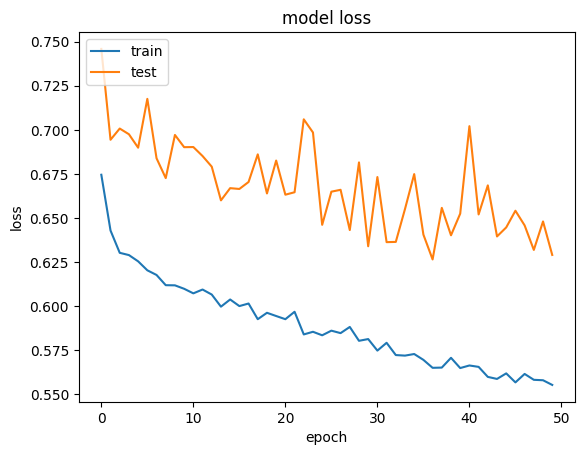

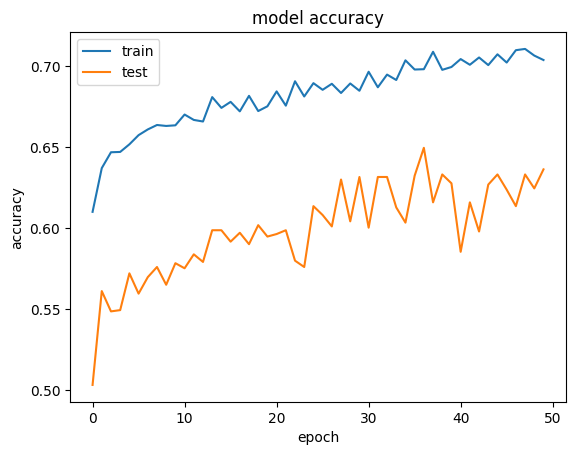

In [ ]:
plt.plot(train_result.history['loss'])
plt.plot(train_result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(train_result.history['accuracy'])
plt.plot(train_result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##Sliding feature selection

In [ ]:
random.seed(7)
tf.random.set_seed(7)
np.random.seed(7)

model = Sequential()
model.add(Dense(64, input_shape=(51,), activation='relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'AUC', keras.metrics.Precision(), keras.metrics.Recall()])

sliding_train_bal_x_feat_tr = sliding_train_bal_x_feat[:5112]
sliding_train_bal_y_tr = sliding_train_bal_y[:5112]
sliding_train_bal_x_feat_val = sliding_train_bal_x_feat[5112:]
sliding_train_bal_y_val = sliding_train_bal_y[5112:]
train_result = model.fit(sliding_train_bal_x_feat_tr, sliding_train_bal_y_tr, epochs=60, batch_size=32, validation_data=(sliding_train_bal_x_feat_val, sliding_train_bal_y_val))

loss, accuracy, auc, precision, recall = model.evaluate(sliding_test_x_feat, sliding_test_y)
print('Test Accuracy:', accuracy)
print('Test Loss:', loss)
print('Test AUC:', auc)
print('Test Precision:', precision)
print('Test Recall:', recall)

f1 = (2*precision*recall)/(precision + recall)

print('Test F1:', f1)

Epoch 1/60
160/160 [==============================] - 3s 6ms/step - loss: 2.4815 - accuracy: 0.5601 - auc: 0.5730 - precision_14: 0.6106 - recall_14: 0.6210 - val_loss: 0.8165 - val_accuracy: 0.5141 - val_auc: 0.6791 - val_precision_14: 0.2960 - val_recall_14: 0.8123
Epoch 2/60
160/160 [==============================] - 0s 3ms/step - loss: 0.9828 - accuracy: 0.5536 - auc: 0.5798 - precision_14: 0.6037 - recall_14: 0.6220 - val_loss: 0.6181 - val_accuracy: 0.4969 - val_auc: 0.5660 - val_precision_14: 0.2897 - val_recall_14: 0.8225
Epoch 3/60
160/160 [==============================] - 1s 4ms/step - loss: 0.7454 - accuracy: 0.6084 - auc: 0.6035 - precision_14: 0.6241 - recall_14: 0.7798 - val_loss: 0.7114 - val_accuracy: 0.4757 - val_auc: 0.6948 - val_precision_14: 0.2826 - val_recall_14: 0.8362
Epoch 4/60
160/160 [==============================] - 0s 3ms/step - loss: 0.6848 - accuracy: 0.6270 - auc: 0.6393 - precision_14: 0.6301 - recall_14: 0.8305 - val_loss: 0.6900 - val_accuracy: 0.46

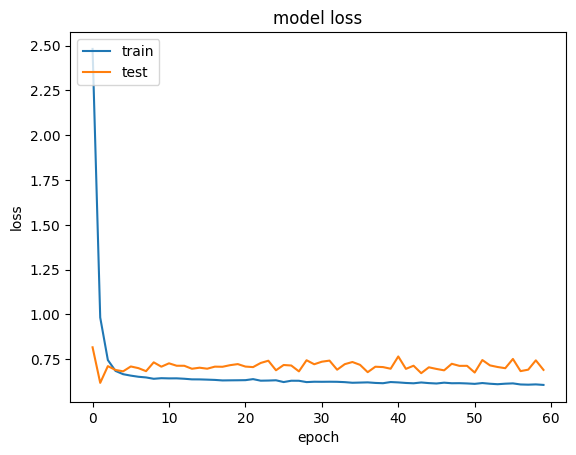

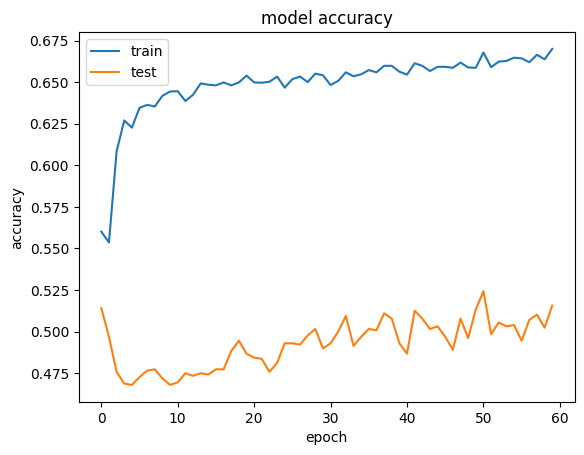

In [ ]:
plt.plot(train_result.history['loss'])
plt.plot(train_result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(train_result.history['accuracy'])
plt.plot(train_result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Sliding feature selection scaled

In [ ]:
random.seed(7)
tf.random.set_seed(7)
np.random.seed(7)

model = Sequential()
model.add(Dense(64, input_shape=(53,), activation='relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'AUC', keras.metrics.Precision(), keras.metrics.Recall()])

sliding_train_bal_x_scale_feat_tr = sliding_train_bal_x_scale_feat[:5112]
sliding_train_bal_y_tr = sliding_train_bal_y[:5112]
sliding_train_bal_x_feat__scale_val = sliding_train_bal_x_scale_feat[5112:]
sliding_train_bal_y_val = sliding_train_bal_y[5112:]
train_result = model.fit(sliding_train_bal_x_scale_feat_tr, sliding_train_bal_y_tr, epochs=17, batch_size=32, validation_data=(sliding_train_bal_x_feat__scale_val, sliding_train_bal_y_val))

loss, accuracy, auc, precision, recall = model.evaluate(sliding_test_x_scale_feat, sliding_test_y)
print('Test Accuracy:', accuracy)
print('Test Loss:', loss)
print('Test AUC:', auc)
print('Test Precision:', precision)
print('Test Recall:', recall)

f1 = (2*precision*recall)/(precision + recall)

print('Test F1:', f1)

Epoch 1/17
160/160 [==============================] - 6s 8ms/step - loss: 0.6643 - accuracy: 0.6109 - auc: 0.6461 - precision_19: 0.6412 - recall_19: 0.7143 - val_loss: 0.7504 - val_accuracy: 0.5125 - val_auc: 0.6733 - val_precision_19: 0.2911 - val_recall_19: 0.7850
Epoch 2/17
160/160 [==============================] - 0s 3ms/step - loss: 0.6389 - accuracy: 0.6377 - auc: 0.6790 - precision_19: 0.6590 - recall_19: 0.7498 - val_loss: 0.6785 - val_accuracy: 0.5767 - val_auc: 0.6826 - val_precision_19: 0.3092 - val_recall_19: 0.6860
Epoch 3/17
160/160 [==============================] - 0s 3ms/step - loss: 0.6304 - accuracy: 0.6389 - auc: 0.6871 - precision_19: 0.6603 - recall_19: 0.7495 - val_loss: 0.6987 - val_accuracy: 0.5603 - val_auc: 0.6839 - val_precision_19: 0.3048 - val_recall_19: 0.7167
Epoch 4/17
160/160 [==============================] - 0s 3ms/step - loss: 0.6287 - accuracy: 0.6483 - auc: 0.6916 - precision_19: 0.6697 - recall_19: 0.7505 - val_loss: 0.7078 - val_accuracy: 0.54

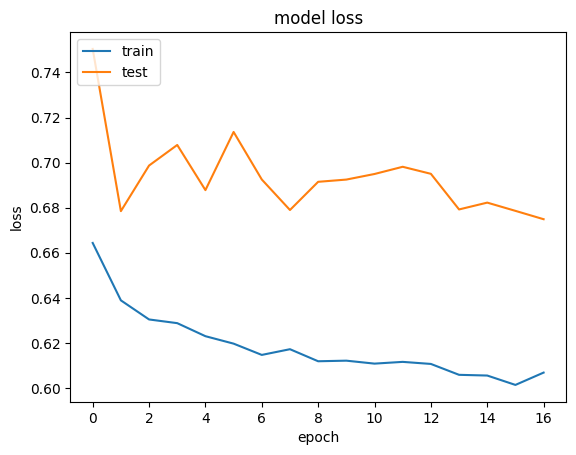

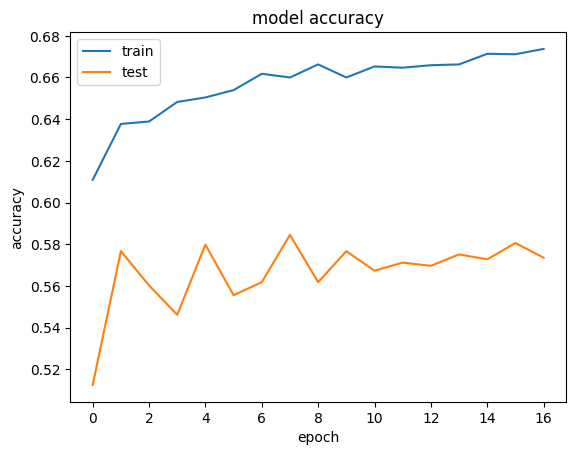

In [ ]:
plt.plot(train_result.history['loss'])
plt.plot(train_result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(train_result.history['accuracy'])
plt.plot(train_result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## EWMA all features

In [ ]:
random.seed(7)
tf.random.set_seed(7)
np.random.seed(7)

model = Sequential()
model.add(Dense(64, input_shape=(70,), activation='relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'AUC', keras.metrics.Precision(), keras.metrics.Recall()])

ewma_train_bal_x_tr = ewma_train_bal_x[:5112]
ewma_train_bal_y_tr = ewma_train_bal_y[:5112]
ewma_train_bal_x_val = ewma_train_bal_x[5112:]
ewma_train_bal_y_val = ewma_train_bal_y[5112:]
train_result = model.fit(ewma_train_bal_x_tr, ewma_train_bal_y_tr, epochs=50, batch_size=32, validation_data=(ewma_train_bal_x_val, ewma_train_bal_y_val))

loss, accuracy, auc, precision, recall = model.evaluate(ewma_test_x, ewma_test_y)
print('Test Accuracy:', accuracy)
print('Test Loss:', loss)
print('Test AUC:', auc)
print('Test Precision:', precision)
print('Test Recall:', recall)

f1 = (2*precision*recall)/(precision + recall)

print('Test F1:', f1)

Epoch 1/50
160/160 [==============================] - 3s 8ms/step - loss: 2.4440 - accuracy: 0.5638 - auc: 0.5691 - precision_23: 0.6105 - recall_23: 0.6396 - val_loss: 0.7988 - val_accuracy: 0.4969 - val_auc: 0.6759 - val_precision_23: 0.2902 - val_recall_23: 0.8259
Epoch 2/50
160/160 [==============================] - 0s 3ms/step - loss: 0.9904 - accuracy: 0.5702 - auc: 0.5854 - precision_23: 0.6126 - recall_23: 0.6609 - val_loss: 0.6244 - val_accuracy: 0.5407 - val_auc: 0.6895 - val_precision_23: 0.3086 - val_recall_23: 0.8089
Epoch 3/50
160/160 [==============================] - 1s 4ms/step - loss: 0.7479 - accuracy: 0.5863 - auc: 0.6138 - precision_23: 0.6214 - recall_23: 0.6940 - val_loss: 0.6983 - val_accuracy: 0.4992 - val_auc: 0.6979 - val_precision_23: 0.2937 - val_recall_23: 0.8430
Epoch 4/50
160/160 [==============================] - 1s 4ms/step - loss: 0.6836 - accuracy: 0.6162 - auc: 0.6354 - precision_23: 0.6283 - recall_23: 0.7929 - val_loss: 0.6953 - val_accuracy: 0.49

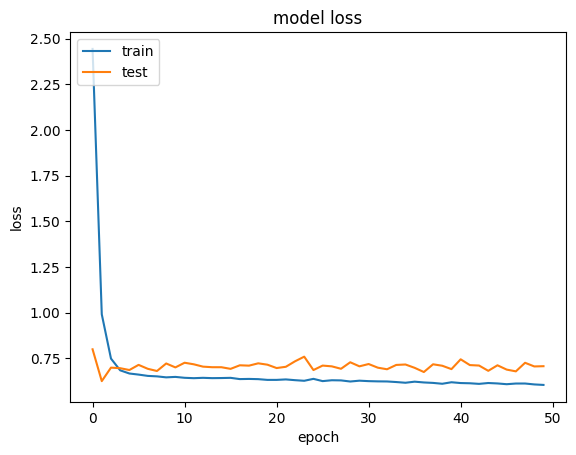

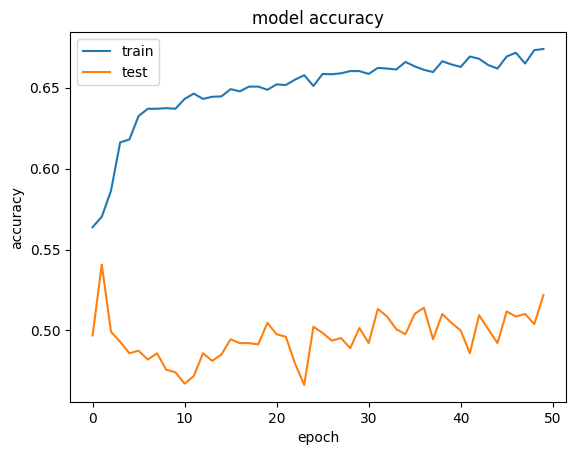

In [ ]:
plt.plot(train_result.history['loss'])
plt.plot(train_result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(train_result.history['accuracy'])
plt.plot(train_result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## EWMA all features scaled

In [ ]:
random.seed(7)
tf.random.set_seed(7)
np.random.seed(7)

model = Sequential()
model.add(Dense(64, input_shape=(70,), activation='relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'AUC', keras.metrics.Precision(), keras.metrics.Recall()])

ewma_train_bal_x_scale_tr = ewma_train_bal_x_scale[:5112]
ewma_train_bal_y_tr = ewma_train_bal_y[:5112]
ewma_train_bal_x_scale_val = ewma_train_bal_x_scale[5112:]
ewma_train_bal_y_val = ewma_train_bal_y[5112:]
train_result=model.fit(ewma_train_bal_x_scale_tr, ewma_train_bal_y_tr, epochs=22, batch_size=32, validation_data=(ewma_train_bal_x_scale_val, ewma_train_bal_y_val))

loss, accuracy, auc, precision, recall = model.evaluate(ewma_test_x_scale, ewma_test_y)
print('Test Accuracy:', accuracy)
print('Test Loss:', loss)
print('Test AUC:', auc)
print('Test Precision:', precision)
print('Test Recall:', recall)

f1 = (2*precision*recall)/(precision + recall)

print('Test F1:', f1)

Epoch 1/22
160/160 [==============================] - 6s 8ms/step - loss: 0.6827 - accuracy: 0.5984 - auc: 0.6173 - precision_27: 0.6301 - recall_27: 0.7085 - val_loss: 0.7417 - val_accuracy: 0.4984 - val_auc: 0.6585 - val_precision_27: 0.2820 - val_recall_27: 0.7679
Epoch 2/22
160/160 [==============================] - 1s 6ms/step - loss: 0.6499 - accuracy: 0.6256 - auc: 0.6596 - precision_27: 0.6456 - recall_27: 0.7550 - val_loss: 0.7040 - val_accuracy: 0.5360 - val_auc: 0.6701 - val_precision_27: 0.2962 - val_recall_27: 0.7440
Epoch 3/22
160/160 [==============================] - 0s 3ms/step - loss: 0.6380 - accuracy: 0.6365 - auc: 0.6777 - precision_27: 0.6552 - recall_27: 0.7595 - val_loss: 0.7123 - val_accuracy: 0.5415 - val_auc: 0.6753 - val_precision_27: 0.3018 - val_recall_27: 0.7611
Epoch 4/22
160/160 [==============================] - 0s 3ms/step - loss: 0.6319 - accuracy: 0.6440 - auc: 0.6837 - precision_27: 0.6591 - recall_27: 0.7722 - val_loss: 0.7123 - val_accuracy: 0.53

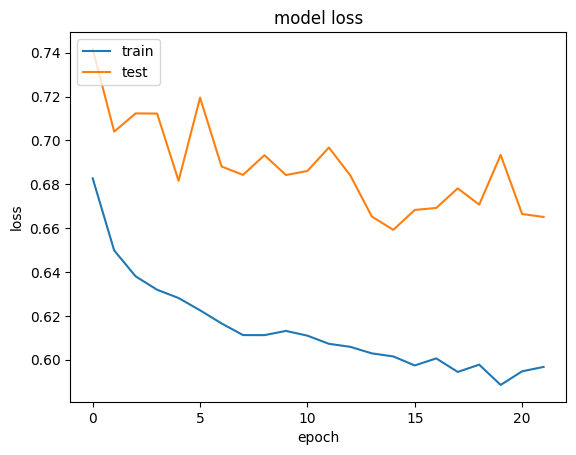

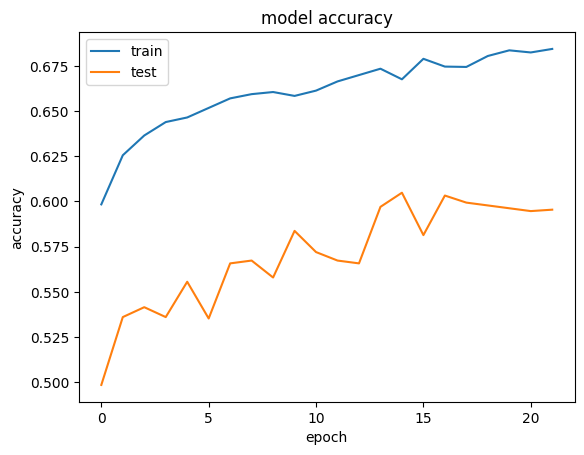

In [ ]:
plt.plot(train_result.history['loss'])
plt.plot(train_result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(train_result.history['accuracy'])
plt.plot(train_result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## EWMA feature selection

In [ ]:
random.seed(7)
tf.random.set_seed(7)
np.random.seed(7)

model = Sequential()
model.add(Dense(64, input_shape=(62,), activation='relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'AUC', keras.metrics.Precision(), keras.metrics.Recall()])

ewma_train_bal_x_feat_tr = ewma_train_bal_x_feat[:5112]
ewma_train_bal_y_tr = ewma_train_bal_y[:5112]
ewma_train_bal_x_feat_val = ewma_train_bal_x_feat[5112:]
ewma_train_bal_y_val = ewma_train_bal_y[5112:]
train_result = model.fit(ewma_train_bal_x_feat_tr, ewma_train_bal_y_tr, epochs=25, batch_size=32, validation_data=(ewma_train_bal_x_feat_val, ewma_train_bal_y_val))

loss, accuracy, auc, precision, recall = model.evaluate(ewma_test_x_feat, ewma_test_y)
print('Test Accuracy:', accuracy)
print('Test Loss:', loss)
print('Test AUC:', auc)
print('Test Precision:', precision)
print('Test Recall:', recall)

f1 = (2*precision*recall)/(precision + recall)

print('Test F1:', f1)

Epoch 1/25
160/160 [==============================] - 4s 9ms/step - loss: 2.1821 - accuracy: 0.5587 - auc: 0.5758 - precision_29: 0.6101 - recall_29: 0.6168 - val_loss: 0.8071 - val_accuracy: 0.5336 - val_auc: 0.6758 - val_precision_29: 0.2993 - val_recall_29: 0.7713
Epoch 2/25
160/160 [==============================] - 1s 6ms/step - loss: 0.9067 - accuracy: 0.5765 - auc: 0.5988 - precision_29: 0.6220 - recall_29: 0.6475 - val_loss: 0.6129 - val_accuracy: 0.5978 - val_auc: 0.6161 - val_precision_29: 0.2879 - val_recall_29: 0.5119
Epoch 3/25
160/160 [==============================] - 1s 4ms/step - loss: 0.7351 - accuracy: 0.5972 - auc: 0.5988 - precision_29: 0.6235 - recall_29: 0.7333 - val_loss: 0.6459 - val_accuracy: 0.4930 - val_auc: 0.6691 - val_precision_29: 0.2889 - val_recall_29: 0.8294
Epoch 4/25
160/160 [==============================] - 1s 4ms/step - loss: 0.6769 - accuracy: 0.6285 - auc: 0.6421 - precision_29: 0.6323 - recall_29: 0.8260 - val_loss: 0.6701 - val_accuracy: 0.47

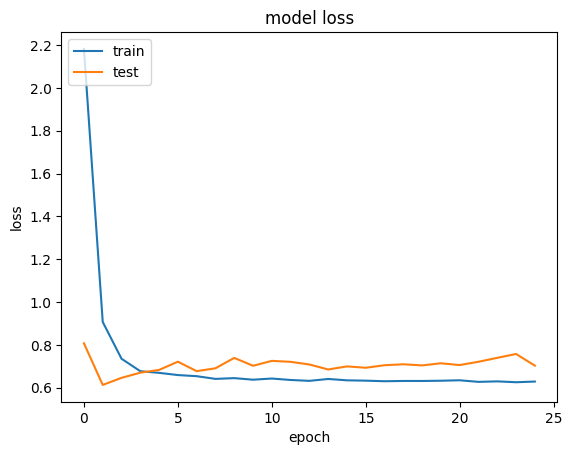

Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x7f546c5d6e60>
Traceback (most recent call last):
  File "/usr/lib/python3.10/weakref.py", line 370, in remove
    def remove(k, selfref=ref(self)):
KeyboardInterrupt: 


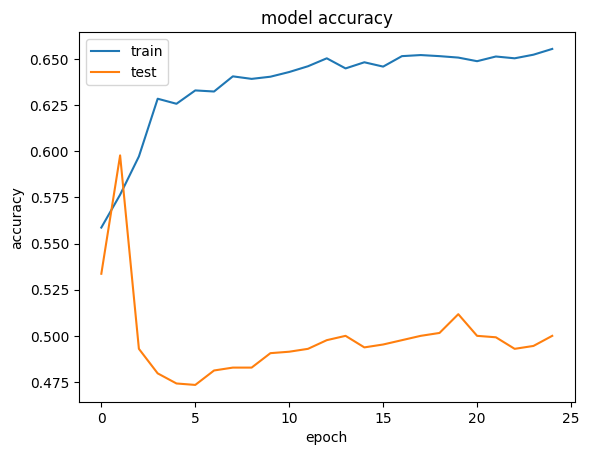

In [ ]:
plt.plot(train_result.history['loss'])
plt.plot(train_result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(train_result.history['accuracy'])
plt.plot(train_result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## EWMA feature selection scaled

In [ ]:
random.seed(7)
tf.random.set_seed(7)
np.random.seed(7)

model = Sequential()
model.add(Dense(64, input_shape=(59,), activation='relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'AUC', keras.metrics.Precision(), keras.metrics.Recall()])

ewma_train_bal_x_scale_feat_tr = ewma_train_bal_x_scale_feat[:5112]
ewma_train_bal_y_tr = ewma_train_bal_y[:5112]
ewma_train_bal_x_scale_feat_val = ewma_train_bal_x_scale_feat[5112:]
ewma_train_bal_y_val = ewma_train_bal_y[5112:]
train_result = model.fit(ewma_train_bal_x_scale_feat_tr, ewma_train_bal_y_tr, epochs=60, batch_size=32, validation_data=(ewma_train_bal_x_scale_feat_val, ewma_train_bal_y_val))

loss, accuracy, auc, precision, recall = model.evaluate(ewma_test_x_scale_feat, ewma_test_y)
print('Test Accuracy:', accuracy)
print('Test Loss:', loss)
print('Test AUC:', auc)
print('Test Precision:', precision)
print('Test Recall:', recall)

f1 = (2*precision*recall)/(precision + recall)

print('Test F1:', f1)

Epoch 1/60
160/160 [==============================] - 7s 17ms/step - loss: 0.6825 - accuracy: 0.5898 - auc: 0.6195 - precision_31: 0.6234 - recall_31: 0.7006 - val_loss: 0.7486 - val_accuracy: 0.4992 - val_auc: 0.6714 - val_precision_31: 0.2866 - val_recall_31: 0.7952
Epoch 2/60
160/160 [==============================] - 1s 9ms/step - loss: 0.6519 - accuracy: 0.6293 - auc: 0.6616 - precision_31: 0.6492 - recall_31: 0.7550 - val_loss: 0.6964 - val_accuracy: 0.5501 - val_auc: 0.6769 - val_precision_31: 0.3014 - val_recall_31: 0.7304
Epoch 3/60
160/160 [==============================] - 1s 4ms/step - loss: 0.6359 - accuracy: 0.6352 - auc: 0.6796 - precision_31: 0.6557 - recall_31: 0.7526 - val_loss: 0.7017 - val_accuracy: 0.5430 - val_auc: 0.6893 - val_precision_31: 0.3042 - val_recall_31: 0.7713
Epoch 4/60
160/160 [==============================] - 1s 4ms/step - loss: 0.6321 - accuracy: 0.6436 - auc: 0.6854 - precision_31: 0.6586 - recall_31: 0.7726 - val_loss: 0.7004 - val_accuracy: 0.5

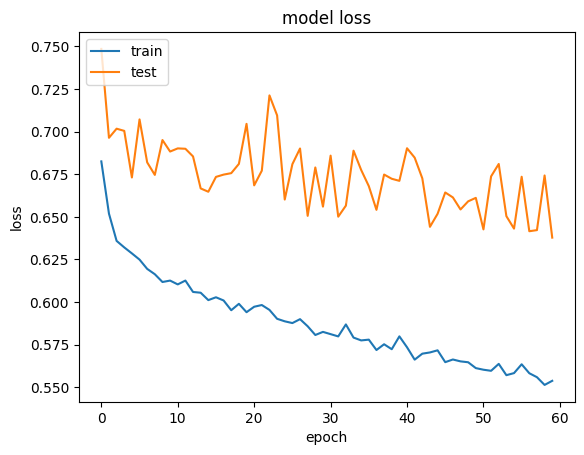

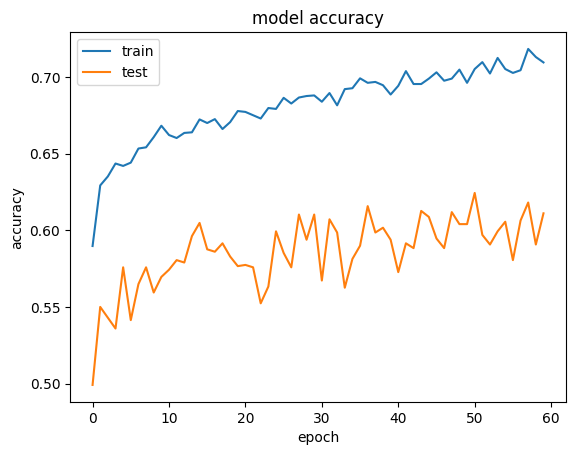

In [ ]:
plt.plot(train_result.history['loss'])
plt.plot(train_result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(train_result.history['accuracy'])
plt.plot(train_result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()